## 1. Suppose we have a dataset that shows the number of bedrooms and the selling price for 20 houses in a particular neighborhood
Bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]
Prices = 
[120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]


In [1]:
import numpy as np
# import random

bedrooms = np.array([1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6])
prices = np.array([120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488])

## 2. Using the Bedrooms data points:
- Extract a random sample of size 10
- Compute the mean and standard deviation of the sample
- Compute the the mean of the population
- Computer the confidence interval of 95% using the sample 
- Check if the population mean lies between the upper and lower bounds of the interval


In [4]:
sample_bedrooms = np.random.choice(bedrooms, 10) # Extract a random sample of size 10
print('\nSample :', sample_bedrooms)

sample_bedrooms_mean = np.mean(sample_bedrooms) # Compute the mean and 
sample_bedrooms_std = np.std(sample_bedrooms, ddof=1) # standard deviation of the sample
print('Mean and st.d. of sample are : {:.2f}, {:.2f}'.format(
    sample_bedrooms_mean, sample_bedrooms_std))

bedrooms_mean = np.mean(bedrooms) # Compute the the mean of the population
print('Mean of the population is :', bedrooms_mean)

# Computer the confidence interval of 95% using the sample

sample_ci = np.around([sample_bedrooms_mean - 1.96 * sample_bedrooms_std / (10 ** 0.5), 
            sample_bedrooms_mean + 1.96 * sample_bedrooms_std / (10 ** 0.5)], 2)
print('Confidence interval 95% is :', sample_ci)

check_mean_in_ci = sample_ci[0] <= bedrooms_mean <= sample_ci[1]
print('Is the mean of the population between CI? :', check_mean_in_ci)



Sample : [3 3 3 4 5 3 3 3 1 3]
Mean and st.d. of sample are : 3.10, 0.99
Mean of the population is : 3.0
Confidence interval 95% is : [2.48 3.72]
Is the mean of the population between CI? : True


## 3. Using both of the Bedrooms and the Prices:
- Compute the covariance and the correlation between the two variables
- Build a regression model and estimate the regression parameters (slope and intercept).
- Predict the house price for a house with 7 rooms
- Estimate the upper bound and the lower bounds of the prediction interval of a house with 7 rooms

In [5]:
cov = np.around(np.cov(bedrooms, prices), 4)
print('Covariation is :', cov[0, 1])

cor = np.around(np.corrcoef(bedrooms, prices), 4)
print('Correlation is :', cor[0, 1])

Covariation is : 133.8947
Correlation is : 0.9719


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(bedrooms.reshape((-1, 1)), prices)

r_sq = model.score(bedrooms.reshape((-1, 1)), prices)
print(f'Coefficient of determination : {r_sq:.4f}')
print(f'Interceprion : {model.intercept_:.2f}')
print(f'Slope : {float(model.coef_):.2f}')
predict7 = model.predict([[7]])
print(f'Predicted price for 7 bedrooms : {predict7[0]:.0f}')
y_hat = model.predict(bedrooms.reshape((-1, 1)))
print('y_hat :', y_hat.round(1))

Coefficient of determination : 0.9447
Interceprion : 39.45
Slope : 70.67
Predicted price for 7 bedrooms : 534
y_hat : [110.1 110.1 110.1 180.8 180.8 180.8 180.8 251.4 251.4 251.4 251.4 251.4
 251.4 251.4 322.1 322.1 322.1 392.8 392.8 463.5]


In [9]:
from scipy.stats import t

#Estimate the upper bound and the lower bounds of the prediction interval of a house with 7 rooms
Alpha = 0.1
N = 20
Df = N-2
residual_error = np.sqrt(np.square(prices - y_hat).sum() / (N - 2))
residual_error *= (1 + (1 / N) + ((np.square(7 - bedrooms_mean)) / (np.square(bedrooms - bedrooms_mean).sum())))
residual_error

36.14741937614454

In [11]:
t_value = t.ppf(1 - Alpha / 2, df=N-2)
t_value

1.7340636066175354

In [12]:
LP = round(predict7[0] - t_value*residual_error, 4)
UP = round(predict7[0] + t_value*residual_error, 4)
print(f'The prediction 95% interval is [{LP}, {UP}]')

The prediction 95% interval is [471.4347, 596.7986]


## 4. Using as sample of houses that have only 3 bedrooms 
- Try to find the lower price that can be payed for a house with 3 rooms using Tolerance interval
- Try  to find the highest price that can be payed for a house with 3 rooms using Tolerance interval


In [57]:
data = zip(bedrooms, prices)
sample_3bed = np.array([item[1] for item in data if item[0] == 3])
print(sample_3bed)

mean_3bed = sample_3bed.mean()
std_3bed = sample_3bed.std(ddof=1)
len_3bed = sample_3bed.size
print(f'mean : {mean_3bed:.2f}, std : {std_3bed:.2f}, length : {len_3bed}')

[205 244 213 236 280 275 273]
mean : 246.57, std : 30.54, length : 7


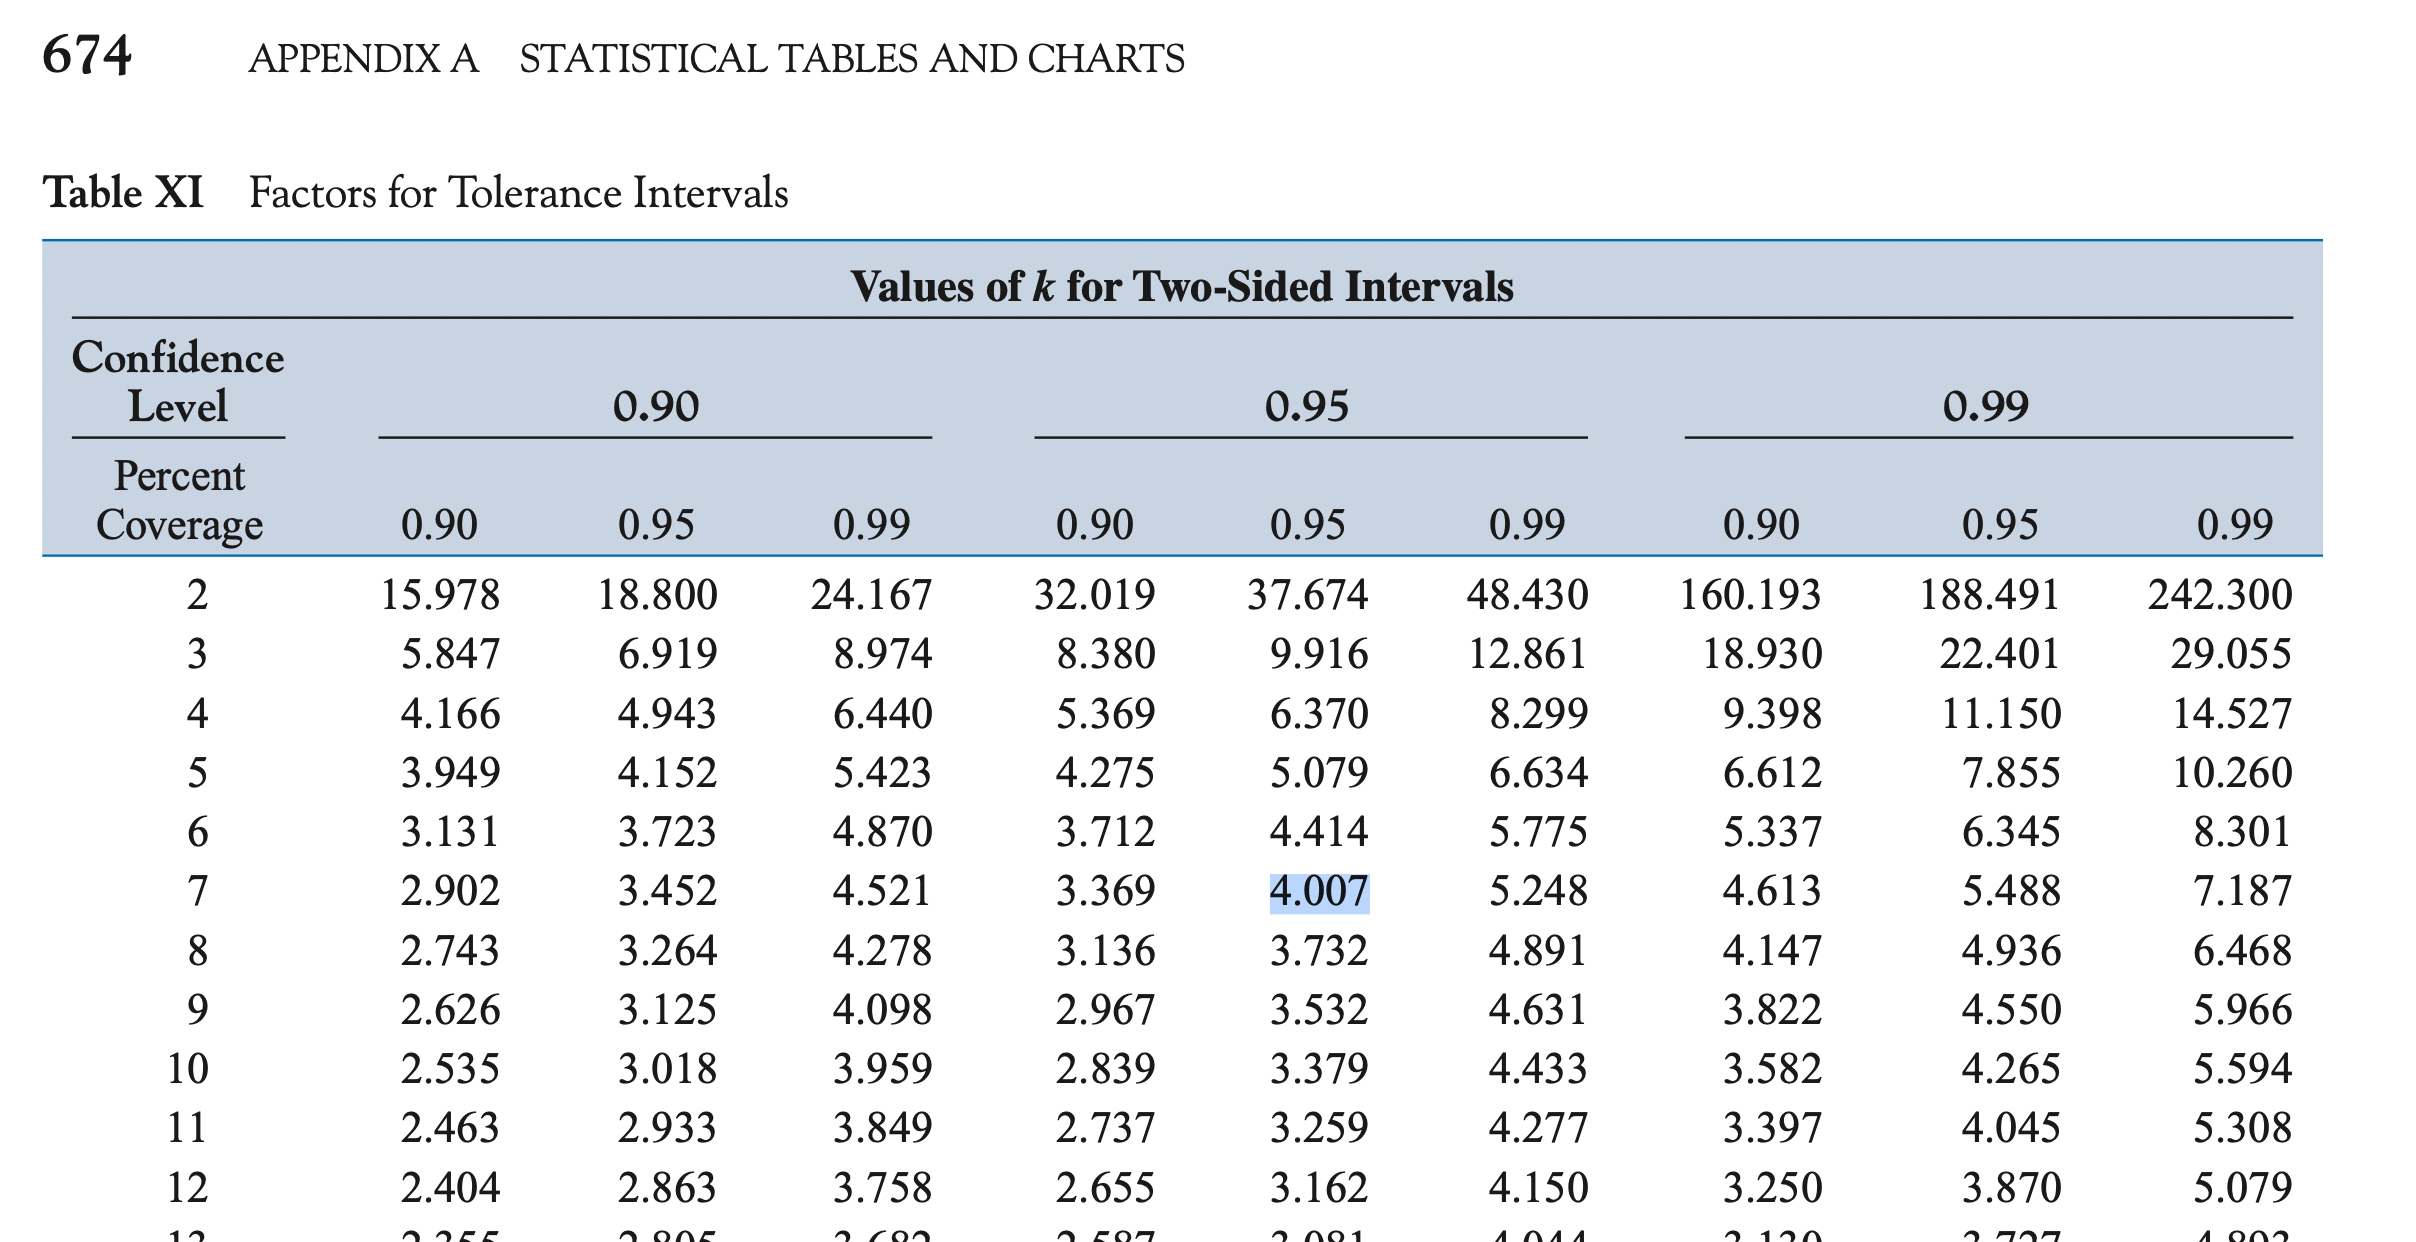

In [58]:
# I have chosen two sided k for 95% confidence level and 95% coverage
k_value = 4.007

# 'With 95% confidence that the 95% of 3 bedrooms appartments will'
lower = mean_3bed - k_value * std_3bed
upper = mean_3bed + k_value * std_3bed

print(f'Lower bound : {lower:.2f}, Upper bound : {upper:.2f}')

Lower bound : 124.18, Upper bound : 368.96
